In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from grafica_Grad import *

In [3]:
# Ejemplos de entrada
X = np.array([2, 1, -1])

# Salida esperada para cada ejemplo
Y = np.array([3, 1, -3])

In [4]:
# --- puntos, titulos y ph se utilizan sólo para dibujar ---

X = X.reshape(-1,1)  # convierte a X en un vector columna
Y = Y.reshape(-1,1)  # lo mismo para Y (esto es sólo para dibujar)
puntos = np.concatenate((X,Y), axis=1)

titulos = np.array(['X','Y'])
ph=0  # manejador de la figura para ir cambiando la recta de lugar

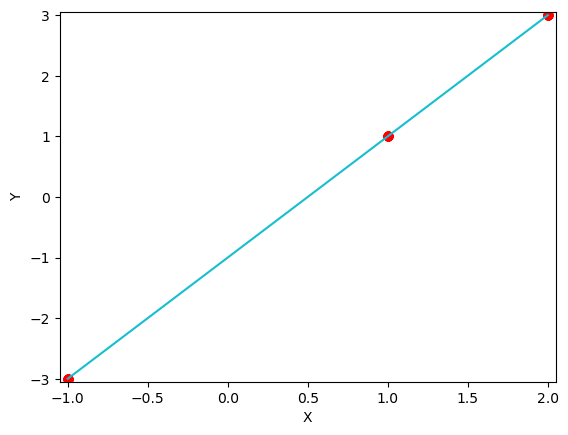

ite 50


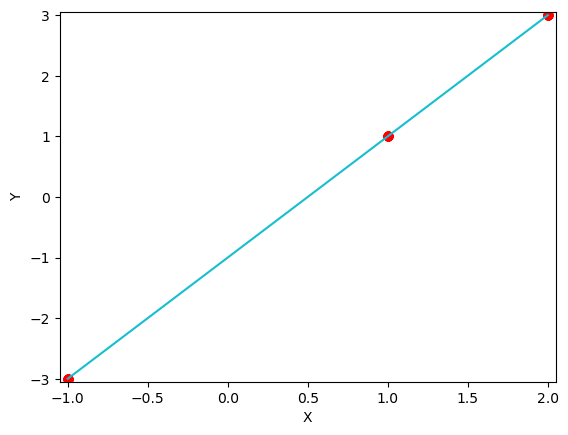

In [5]:
#--- parámetros del COMBINADOR LINEAL ---
MAX_ITE = 50
alfa = 0.05

#--- Los pesos iniciales son aleatorios
W = np.random.uniform(-0.5, 0.5,size=X.shape[1])
b = np.random.uniform(-0.5, 0.5)

W = np.array([7]) #np.random.uniform(-5, 5,size=X.shape[1])
b = np.array([7.5]) #np.random.uniform(-5, 5)

#--- al finalizar ERRORES debe contener el ECM de c/iteración ---
errores = []

# --- Entrenamiento del combinador lineal ---
nEjem = X.shape[0]  # nro. de filas
nAtrib = X.shape[1]         #nro. de columnas

Ptos = []

ite = 0
ErrorAnt = 0
ErrorAct = (1/3)*(19-20*W-2*b+6*W*W+4*W*b+3*b*b)
cotaError = 10e-10

while (ite < MAX_ITE) and (np.abs(ErrorAnt- ErrorAct) > cotaError):
    PtoAnt = [b[0], W[0], ErrorAct[0]]
    ErrorAnt = ErrorAct
    ErrorAct = 0
    for e in range(nEjem):
        
        # Calcular y  (la salida del combinador lineal)
        neta = W[0]*X[e] + b
        y = neta
        
        errorXi = Y[e]-y
        
        grad_W = -2 * errorXi * X[e]
        grad_b = -2 * errorXi * 1
        
        W= W - alfa * grad_W
        b   = b - alfa * grad_b
        
        ErrorAct = ErrorAct + errorXi**2
    
    errores.append(ErrorAct/nEjem)  # promedio de los errores al cuadrado
    
    # graficar la recta
    ph = dibuPtosRecta(puntos, np.zeros(puntos.shape[0]), np.array([W, -1],dtype=object),b, titulos, ph)

    ErrorAct = (1/3)*(19-20*W-2*b+6*W*W+4*W*b+3*b*b)
    PtoAct = [b[0], W[0], ErrorAct[0]]
    Ptos.append([PtoAnt, PtoAct])
    
    ite = ite + 1
    print("ite %d" % ite)

In [6]:
print("W = ", W)
print("b = ", b)

W =  [1.99996575]
b =  [-0.99993149]


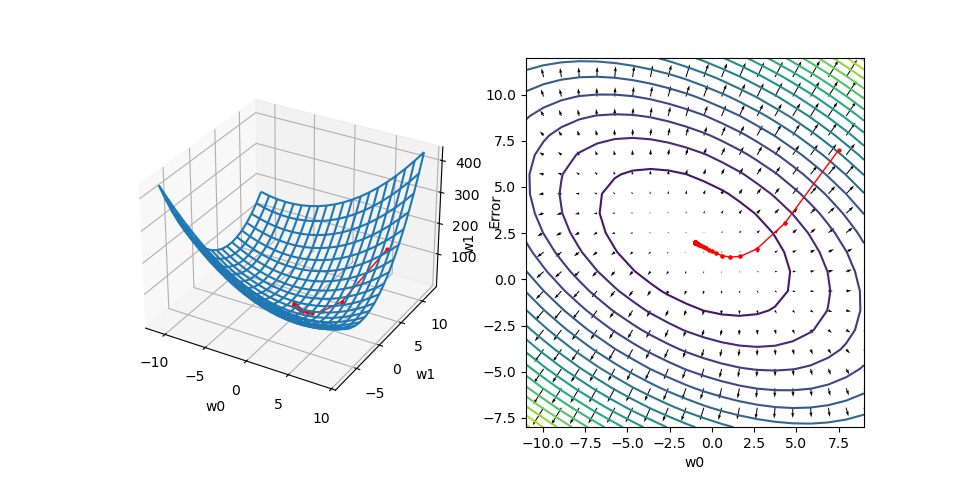

<Figure size 640x480 with 0 Axes>

In [8]:
crearAnimacion(4,Ptos)

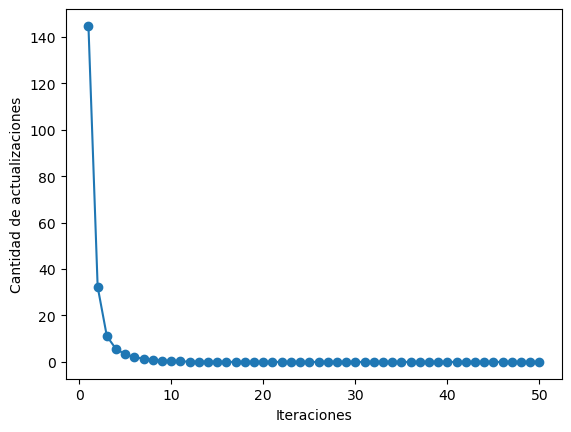

In [9]:
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()